In [107]:
import load_kaggle
import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas
import geoplot
import re

In [108]:
data_dict = load_kaggle.get_kaggle_data('noaa/hurricane-database')

100%|██████████| 901k/901k [00:02<00:00, 358kB/s]



'tmp_data' folder removed


In [109]:
pacific = data_dict.get('pacific.csv')
atlantic = data_dict.get('atlantic.csv')

In [110]:
pacific = pacific.applymap(lambda x: x.strip())
atlantic = atlantic.applymap(lambda x: x.strip())

##### Status: <br>
- TD $\rightarrow $ Tropical cyclone of tropical depression intensity (< 34 knots) <br>
- TS $\rightarrow $ Tropical cyclone of tropical storm intensity (34-63 knots) <br>
- HU $\rightarrow $ Tropical cyclone of hurricane intensity (> 64 knots) <br>
- EX $\rightarrow $ Extratropical cyclone (of any intensity)  <br>
- SD $\rightarrow $ Subtropical cyclone of subtropical depression intensity (< 34 knots) <br>
- SS $\rightarrow $ Subtropical cyclone of subtropical storm intensity (> 34 knots) <br> 
- LO $\rightarrow $ A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone <br>
- WV $\rightarrow $ Tropical Wave (of any intensity) <br>
- DB $\rightarrow $ Disturbance (of any intensity)<br>
<br>

##### Event: <br>
C $\rightarrow$ Closest approach to a coast, not followed by a landfall
G $\rightarrow$ Genesis <br>
I $\rightarrow$ An intensity peak in terms of both pressure and wind <br>
L $\rightarrow$ Landfall (center of system crossing a coastline) <br>
P $\rightarrow$ Minimum in central pressure <br>
R $\rightarrow$ Provides additional detail on the intensity of the cyclone when rapid changes are underway <br>
S $\rightarrow$ Change of status of the systemT – Provides additional detail on the track (position) of the cyclone <br>

In [111]:
# remove leading whitespace
atlantic.Event = atlantic.Event.str.strip()
pacific.Event = pacific.Event.str.strip()
atlantic.Status = atlantic.Status.str.strip()
pacific.Status = pacific.Status.str.strip()

In [156]:
pacific

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Geometry,geometry
0,EP011949,UNNAMED,19490611,0,,TS,20.2,-106.3,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,POINT (-106.30000 20.20000),POINT (-106.30000 20.20000)
1,EP011949,UNNAMED,19490611,600,,TS,20.2,-106.4,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,POINT (-106.40000 20.20000),POINT (-106.40000 20.20000)
2,EP011949,UNNAMED,19490611,1200,,TS,20.2,-106.7,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,POINT (-106.70000 20.20000),POINT (-106.70000 20.20000)
3,EP011949,UNNAMED,19490611,1800,,TS,20.3,-107.7,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,POINT (-107.70000 20.30000),POINT (-107.70000 20.30000)
4,EP011949,UNNAMED,19490612,0,,TS,20.4,-108.6,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,POINT (-108.60000 20.40000),POINT (-108.60000 20.40000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,20151128,1200,,LO,21.7,-109.0,35,1002,...,0,0,0,0,0,0,0,0,POINT (-109.00000 21.70000),POINT (-109.00000 21.70000)
26133,EP222015,SANDRA,20151128,1800,,LO,22.4,-108.7,30,1007,...,0,0,0,0,0,0,0,0,POINT (-108.70000 22.40000),POINT (-108.70000 22.40000)
26134,EP222015,SANDRA,20151129,0,,LO,23.1,-108.3,30,1008,...,0,0,0,0,0,0,0,0,POINT (-108.30000 23.10000),POINT (-108.30000 23.10000)
26135,EP222015,SANDRA,20151129,600,,LO,23.5,-107.9,25,1009,...,0,0,0,0,0,0,0,0,POINT (-107.90000 23.50000),POINT (-107.90000 23.50000)


In [157]:
atlantic

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Geometry,geometry
0,AL011851,UNNAMED,18510625,0,,HU,28.0,-94.8,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,POINT (-94.80000 28.00000),POINT (-94.80000 28.00000)
1,AL011851,UNNAMED,18510625,600,,HU,28.0,-95.4,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,POINT (-95.40000 28.00000),POINT (-95.40000 28.00000)
2,AL011851,UNNAMED,18510625,1200,,HU,28.0,-96.0,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,POINT (-96.00000 28.00000),POINT (-96.00000 28.00000)
3,AL011851,UNNAMED,18510625,1800,,HU,28.1,-96.5,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,POINT (-96.50000 28.10000),POINT (-96.50000 28.10000)
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2,-96.8,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,POINT (-96.80000 28.20000),POINT (-96.80000 28.20000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49100,AL122015,KATE,20151112,1200,,EX,41.3,-50.4,55,981,...,120,120,60,0,0,0,0,0,POINT (-50.40000 41.30000),POINT (-50.40000 41.30000)
49101,AL122015,KATE,20151112,1800,,EX,41.9,-49.9,55,983,...,120,120,60,0,0,0,0,0,POINT (-49.90000 41.90000),POINT (-49.90000 41.90000)
49102,AL122015,KATE,20151113,0,,EX,41.5,-49.2,50,985,...,120,120,60,0,0,0,0,0,POINT (-49.20000 41.50000),POINT (-49.20000 41.50000)
49103,AL122015,KATE,20151113,600,,EX,40.8,-47.5,45,985,...,0,0,0,0,0,0,0,0,POINT (-47.50000 40.80000),POINT (-47.50000 40.80000)


In [114]:
atlantic.replace(to_replace = "^s\s$", value = np.nan, regex = True, inplace = True)

In [115]:
pacific.replace(to_replace = "^\s\s$", value = np.nan, regex = True, inplace = True)

In [116]:
type_dictionary = {"Event": "category", "Status": "category"}
pacific = pacific.astype(type_dictionary)
atalantic = atlantic.astype(type_dictionary)

In [117]:
df_p = pacific.groupby(['Status']).count().ID.reset_index(name = "Count").sort_values(["Count"]).reset_index(drop = True)
df_a = atlantic.groupby(['Status']).count().ID.reset_index(name = "Count").sort_values(["Count"]).reset_index(drop = True)

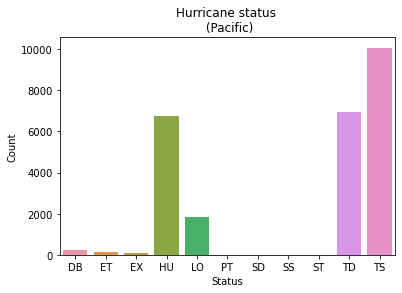

In [118]:
# returns matplotlib axes instance
_ = sns.barplot(x = df_p.Status, y = df_p.Count).set_title("Hurricane status \n (Pacific)")
# WARUM HIER NICHT GEORDNET ??!

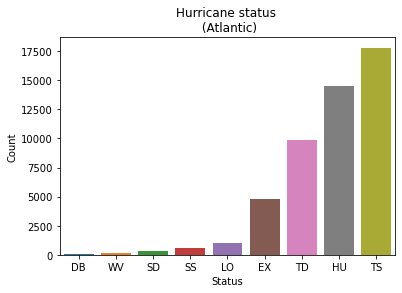

In [119]:
_ = sns.barplot(x = df_a.Status, y = df_a.Count).set_title("Hurricane status \n (Atlantic)")

In [120]:
df_p = pacific.groupby("Event").count().ID.reset_index(name = "Count").sort_values(["Count"]).reset_index(drop = True)
df_a = atlantic.groupby("Event").count().ID.reset_index(name = "Count").sort_values(["Count"]).reset_index(drop = True)

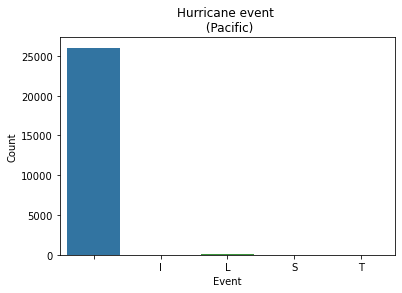

In [121]:
_ = sns.barplot(x = df_p.Event, y = df_p.Count).set_title("Hurricane event \n (Pacific)")

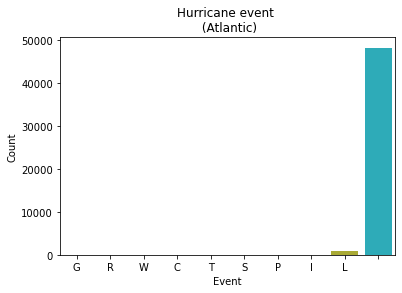

In [122]:
_ = sns.barplot(x = df_a.Event, y = df_a.Count).set_title("Hurricane event \n (Atlantic)")

In [123]:
def make_geom_coordinate(strCoordinate):
    assert isinstance(strCoordinate, str), "Only string type allowed in make_geom_coordinate"
    if strCoordinate.endswith("W"):
        return(np.negative(float(re.sub("[A-Z]", "", strCoordinate))))
    elif strCoordinate.endswith("E"):
        return(float(re.sub("[A-Z]", "", strCoordinate)))
    elif strCoordinate.endswith("N"):
        return(float(re.sub("[A-Z]", "", strCoordinate)))
    elif strCoordinate.endswith("S"):
        return(np.negative(float(re.sub("[A-Z]", "", strCoordinate))))
    else:
        return(np.nan)
                             
        

In [124]:
pacific.Longitude = pacific.Longitude.apply(make_geom_coordinate)
pacific.Latitude = pacific.Latitude.apply(make_geom_coordinate)
atlantic.Longitude = atlantic.Longitude.apply(make_geom_coordinate)
atlantic.Latitude = atlantic.Latitude.apply(make_geom_coordinate)

In [169]:
atlantic.drop(index = atlantic[(atlantic.Longitude < -180) | (atlantic.Longitude > 180)].index,inplace = True)
atlantic.drop(index = atlantic[(atlantic.Latitude > 90) | (atlantic.Latitude < -90)].index, inplace = True)

In [173]:
pacific.drop(index = pacific[(pacific.Longitude < -180) | (pacific.Longitude > 180)].index,inplace = True)
pacific.drop(index = pacific[(pacific.Latitude > 90) | (pacific.Latitude < -90)].index, inplace = True)

In [174]:
pacific["geometry"] = geopandas.points_from_xy(pacific.Longitude, pacific.Latitude)
atlantic["geometry"] = geopandas.points_from_xy(atlantic.Longitude, atlantic.Latitude)

In [176]:
pacific_geo = geopandas.GeoDataFrame(pacific[["Name", "geometry"]])
atlantic_geo = geopandas.GeoDataFrame(atlantic[["Name","geometry"]])

<AxesSubplot:>

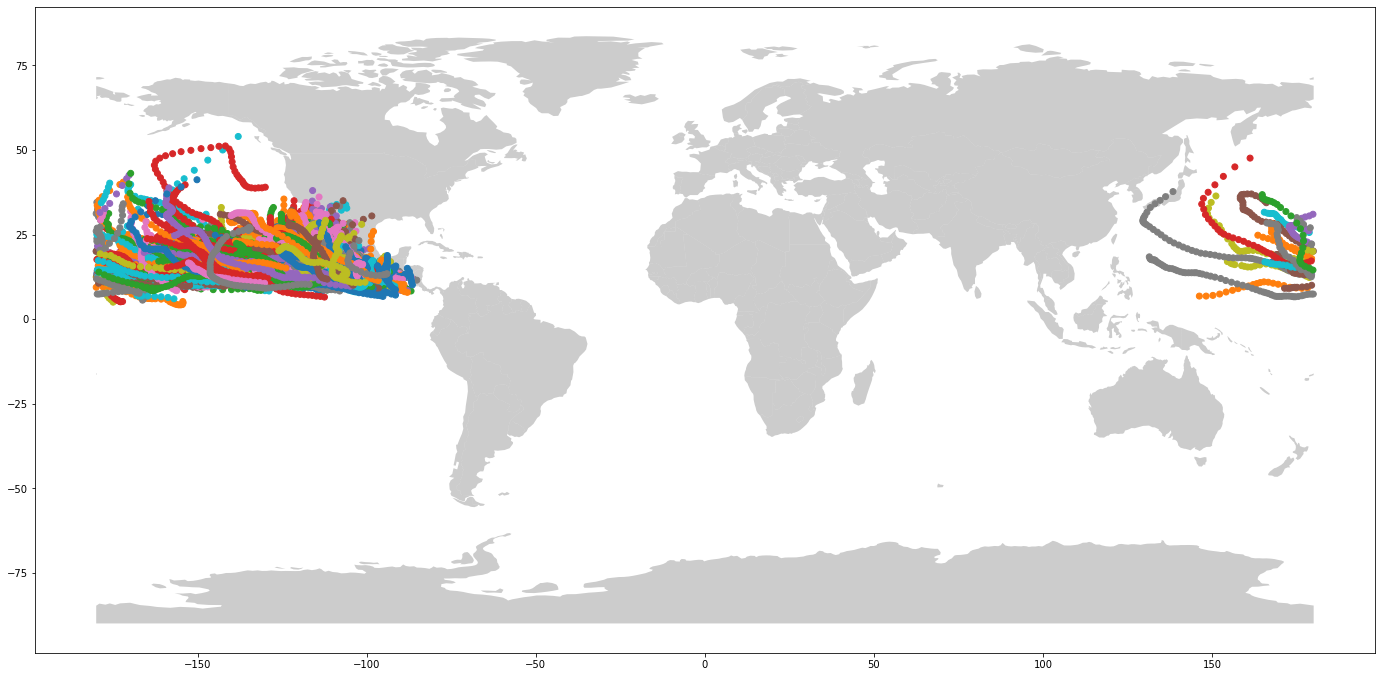

In [177]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize = (24,18))
world.plot(ax = ax, alpha = 0.4, color = "grey")
pacific_geo.plot(column = "Name", ax = ax, legend = False)

<AxesSubplot:>

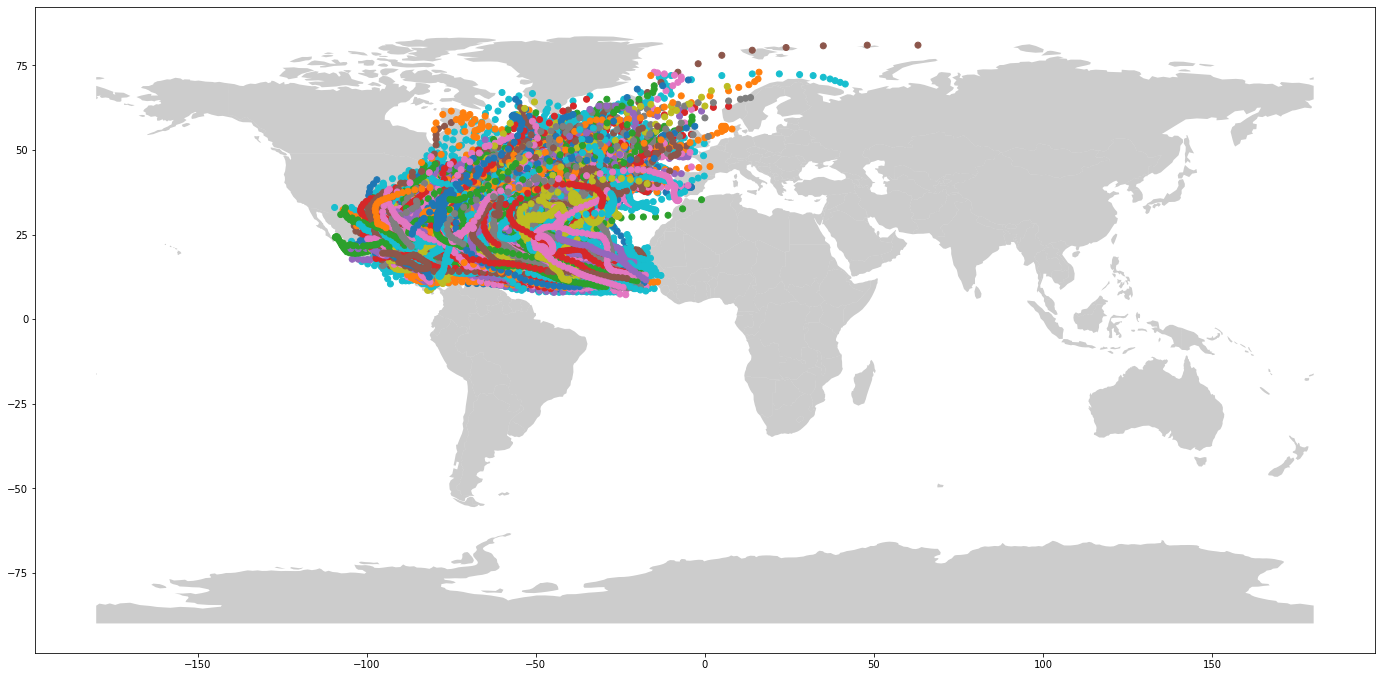

In [178]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize = (24,18))
world.plot(ax = ax, alpha = 0.4, color = "grey")
atlantic_geo.plot(column = "Name", ax = ax, legend = False)